# Linear regression assumptions

Linear regression is a popular statistical technique used to model the relationship between a dependent variable and one or more independent variables. To ensure that your linear regression model is valid, certain assumptions need to be met. Here’s a tutorial on the key assumptions of linear regression, along with a Python example to illustrate these concepts.

## Key Assumptions of Linear Regression
- **Linearity:** The relationship between the dependent variable and the independent variables is linear.
- **Homoscedasticity:** The residuals have constant variance across all levels of the independent variables.
- **Normality of Residuals:** The residuals of the model are normally distributed.
- **No Multicollinearity:** The independent variables are not too highly correlated with each other.
- **No autocorrelation (Independence):** The residuals (errors) of the model are independent of each other.

## Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

## Load dataset

In [ ]:
# Load the dataset
#data = sns.load_dataset('tips')
from sklearn import datasets
data = sns.load_dataset('diabetes')

ValueError: 'diabetes' is not one of the example datasets.

In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Simple linear regression

In [ ]:
# Fit a linear regression model
X = data[['total_bill']]  # Independent variable
y = data['tip']  # Dependent variable

In [ ]:
# Create and fit a regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

### Linear fit plot

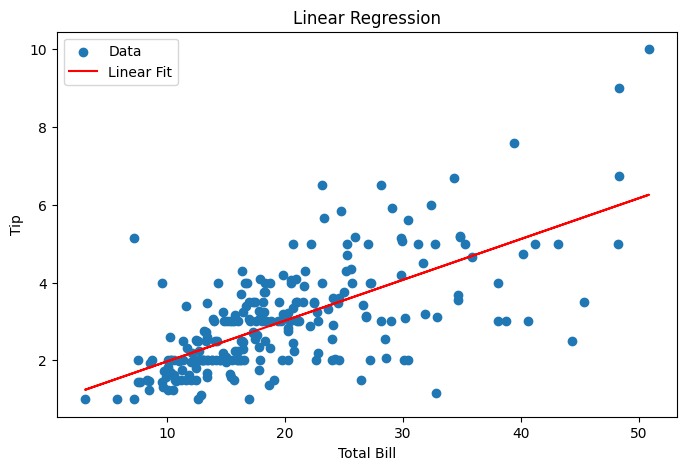

In [ ]:
# Plot the results
plt.figure(figsize=(8, 5))
#plt.scatter(X, y, color='blue', label='Data')
#plt.plot(X, y_pred, color='red', label='Linear Fit')
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color = 'red', label='Linear Fit')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear.

The dependent variable should be a linear combination of independent variables: Y should be a linear combination of X variables. Please note, in the following equation, $x^2$ has raised to the power of 2, the equation is still holding the assumption of a linear combination of variables:

$$y_{pred} = w_0 + w_1 x + w_2 x^2 $$




### Why It Matters
- Model Accuracy: If the linearity assumption is met, the linear regression model provides accurate estimates of the relationships between variables. If the true relationship is not linear, the model may be inappropriate, leading to biased or misleading results.

- Interpretability: Linear models are easier to interpret. The coefficients represent the average change in the dependent variable for a one-unit change in the independent variable, holding other variables constant.

- Statistical Tests: Many statistical tests and measures in linear regression, such as $R^2$ and hypothesis tests for coefficients, assume that the relationship between predictors and the outcome is linear.

### How to Check Linearity
- Scatter Plots
  - Pair Plots: Plot the dependent variable against each independent variable to visually inspect if the relationship appears linear.
  - Residuals vs. Fitted Values Plot: Plot residuals against fitted values. If the relationship is linear, residuals should be randomly scattered around zero without any discernible pattern.


### Pair Plots

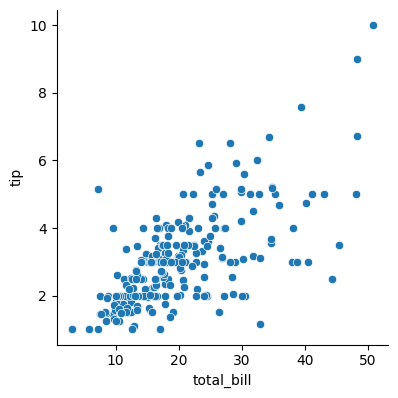

In [ ]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars=['total_bill'], y_vars='tip', height=4)

### Residual plot
- Check if residuals (errors) exhibit any systematic pattern, which would indicate non-linearity.
- A random scatter of residuals around zero suggests that the linearity assumption holds. If there's a pattern (e.g., a curve), it indicates potential non-linearity.

![](https://miro.medium.com/v2/resize:fit:1400/1*E0svDc0lk5j26F3T8HeUxg.png)

### Residual vs fitted values

In [ ]:
# Calculate residuals
residuals = y - y_pred

print(f'Residuals mean: {np.mean(residuals)}')

Residuals mean: 5.096105686803997e-16


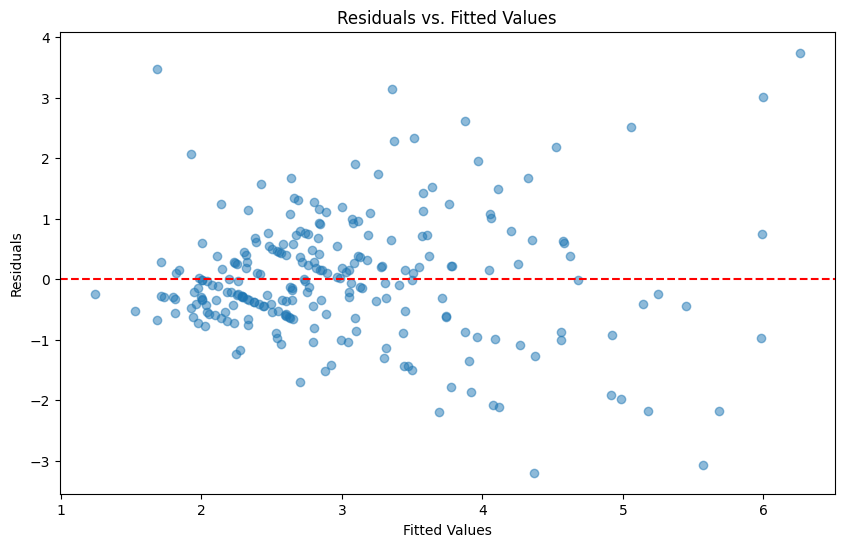

In [ ]:
def residuals_fitted_values_plot(y_pred, residuals, figsize=(10,6)):
    # Plot residuals vs. fitted values
    plt.figure(figsize=figsize)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.show()

residuals_fitted_values_plot(y_pred, residuals)

## Homoscedasticity

Homoscedasticity is an important assumption in linear regression and many other statistical models. It refers to the idea that the variance of the residuals (errors) should be constant across all levels of the independent variables. When this condition is met, the residuals are said to be homoscedastic. If the variance of the residuals changes, it indicates heteroscedasticity, which can affect the validity of the regression model.

- **Valid Inferences:** Homoscedasticity ensures that the standard errors of the regression coefficients are accurate. If the residuals are heteroscedastic, the standard errors may be biased, leading to incorrect conclusions about the significance of predictors.



### How to Check for Homoscedasticity

- Residuals vs. Fitted Values Plot
- Statistical tests: Breusch-Pagan Test, White's Test, Scale-Location Plot

### Residuals vs fitted values plot

![](https://lh3.googleusercontent.com/B2hT0jQlT2xw6-pRWlqMktNDhiteFjk32W13_stPWUU72uaMOxIKGDqhGOzS1x48rl1vMWF72x08x34xnuHueiJ2YcQZHqTpT9jYU_iENLlV9RfJ5nAaWOELMOUEUJJ1ATkJ1E01z6mpI0Ko)

 In a plot showing homoscedasticity, residuals should be randomly scattered around the horizontal line at zero, without forming any pattern. Patterns or funnel shapes indicate heteroscedasticity.

### Dealing with Heteroscedasticity
If you detect heteroscedasticity, you can try the following methods:

- Transform the Dependent Variable: Apply a transformation such as the log or square root to stabilize the variance.
- Weighted Least Squares Regression: Assign weights to data points to correct for non-constant variance.
- Robust Standard Errors: Use robust standard errors to account for heteroscedasticity in the estimation of coefficient variances.

### Apply log transform

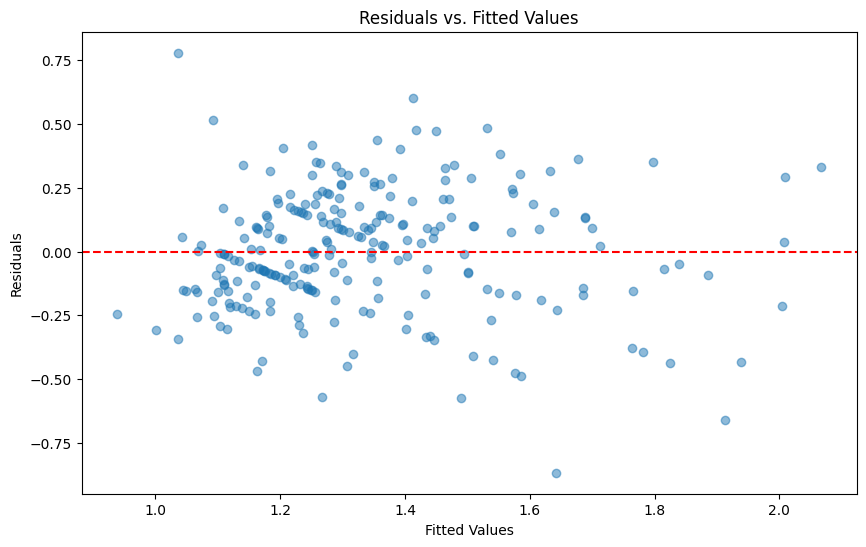

In [ ]:
import numpy as np

# Apply log transformation to the dependent variable
y_log = np.log(y + 1)  # Adding 1 to avoid log(0) issues

# Create and fit a polynomial regression model
model = LinearRegression()
model.fit(X, y_log)

# Predict values
y_pred_log = model.predict(X)

# Calculate residuals
residuals_log = y_log - y_pred_log

# Residuals plot
residuals_fitted_values_plot(y_pred_log, residuals_log)

## Normality of Residuals

This assumption states that the residuals (the differences between the observed values and the values predicted by the model) should be normally distributed.

## Importance of Normality of Residuals
- **Valid Hypothesis Testing:** The normality of residuals allows for accurate hypothesis testing regarding the model coefficients. Many statistical tests, such as t-tests and F-tests, rely on this assumption to ensure that the tests have the correct significance levels.

- **Confidence Intervals:** When residuals are normally distributed, confidence intervals for regression coefficients are accurate and reliable. This ensures that the intervals correctly reflect the uncertainty around the estimates.

- **Model Evaluation:** Normality of residuals helps in assessing the fit of the model. Deviations from normality might indicate model misspecification or the presence of outliers.

## How to Check for Normality of Residuals
- Histogram of Residuals
- Q-Q Plot (Quantile-Quantile Plot)
- Statistical tests: Shapiro-Wilk Test, Kolmogorov-Smirnov Test

### Histogram of residuals

**Purpose:** To visually inspect if the residuals appear to be normally distributed.

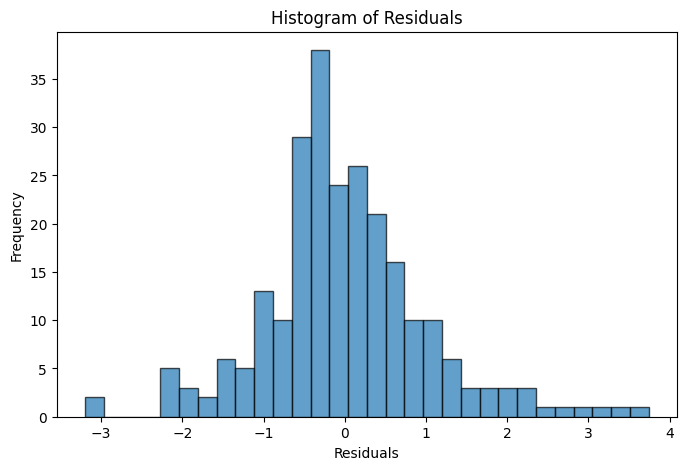

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The histogram should resemble a bell-shaped curve if residuals are normally distributed. Skewness or multiple peaks indicate deviations from normality.

### Q-Q Plot

**Purpose:** To assess if residuals follow a normal distribution by comparing the quantiles of residuals to the quantiles of a standard normal distribution.

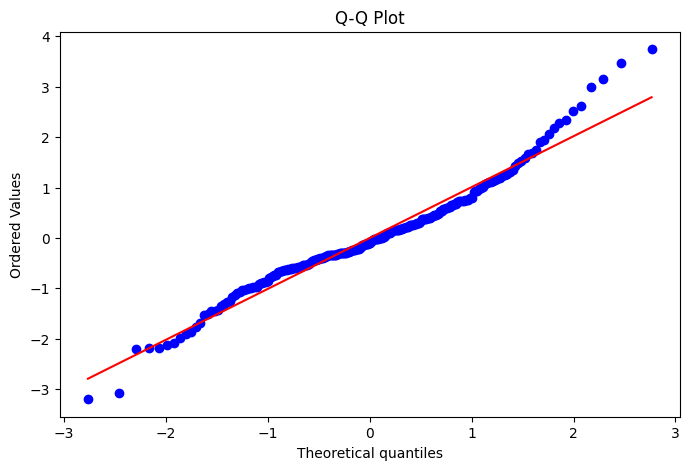

In [ ]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In a Q-Q plot, the residuals should approximately follow the diagonal reference line. Deviations from this line, especially in the tails, suggest deviations from normality.

### What to Do If Residuals Are Not Normally Distributed
- Transform the Dependent Variable: Applying transformations such as log, square root, or inverse to the dependent variable can sometimes normalize residuals.

- Robust Regression Methods: Consider using robust regression techniques that are less sensitive to deviations from normality and outliers.

- Add Missing Predictors: The residuals may not be normal if important predictors are missing. Adding relevant predictors to the model can sometimes resolve non-normality.

- Check for Outliers and Influential Points: Outliers or influential points can distort the distribution of residuals. Use diagnostic tools to identify and assess these points.

- Use Non-parametric Methods: If the normality assumption is not met and cannot be corrected, non-parametric regression methods that do not assume normality might be appropriate.

## No Multicollinearity

Multicollinearity refers to the situation in which two or more independent variables in a regression model are highly correlated, meaning that they provide redundant information about the response variable. This redundancy can make it difficult to isolate the individual effect of each predictor on the dependent variable, and it can lead to several issues in regression analysis.

### Why Multicollinearity Matters
- **Inflated Standard Errors:** Multicollinearity increases the standard errors of the coefficient estimates. This means that the estimates become less precise and can lead to wider confidence intervals.

- **Unstable Coefficients:** High multicollinearity can make the coefficients of the regression model highly sensitive to changes in the model. Small changes in the data can lead to large changes in the coefficient estimates.

- **Reduced Interpretability:** When independent variables are highly correlated, it becomes challenging to determine the effect of each variable on the dependent variable, which complicates interpretation.

- **Model Diagnostics:** Multicollinearity can affect model diagnostics, making it harder to determine whether the model assumptions are met.

### How to Detect Multicollinearity

Multicollinearity is less of a concern in simple linear regression (with one independent variable), but if you had multiple independent variables, you can check for multicollinearity using the following:

- Correlation Matrix
- Variance Inflation Factor (VIF)
- Condition Number

Multicollinearity is less of a concern in simple linear regression (with one independent variable), but if you had multiple independent variables, you would check for multicollinearity using the Variance Inflation Factor (VIF).

In [ ]:
# Load the dataset
data_mult = sns.load_dataset('tips')

# Prepare data
X = data[['total_bill', 'size']]  # Independent variables
y = data['tip']  # Dependent variable

### Correlation matrix

Purpose: To identify high correlations between independent variables.

In [ ]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
             total_bill      size
total_bill    1.000000  0.598315
size          0.598315  1.000000


Look for high correlations (e.g., above 0.8) between pairs of independent variables. High correlations indicate potential multicollinearity.

### Variance Inflation Factor (VIF)

Purpose: To quantify how much the variance of an estimated regression coefficient is increased due to multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF
vif_df = calculate_vif(X)
print("Variance Inflation Factor (VIF):\n", vif_df)

Variance Inflation Factor (VIF):
       Feature       VIF
0  total_bill  8.684373
1        size  8.684373


 A VIF value greater than 10 (some sources use 5) suggests significant multicollinearity.

### Addressing Multicollinearity

If you detect multicollinearity, here are some strategies to address it:

- **Remove Highly Correlated Predictors:** Drop one of the highly correlated variables to reduce redundancy.

- **Combine Predictors:** Combine correlated predictors into a single feature using techniques like Principal Component Analysis (PCA).

- **Regularization Techniques:** Use regularization methods like Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization) to handle multicollinearity. Regularization techniques add a penalty for large coefficients, which helps to mitigate multicollinearity.

- **Increase Sample Size:** Sometimes, increasing the sample size can help reduce the impact of multicollinearity.

- **Domain Knowledge:** Use domain knowledge to select the most relevant predictors and remove redundant ones.